In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(1, "../..")
from itertools import product
from prototype_nn import Splitting, predictions, tensor_flatten
import matplotlib.pyplot as plt
import prototype
import torch
%run ../utilities.ipynb

## Training : Simulations

In [34]:
training = pd.DataFrame(data = pd.read_csv("../../data/preds/train/water_tank.csv"))
training.head()

,time,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,x1,x2,x3,x4,x5
0,0.00,3.0,4.0,0.0,0.0,0.0,0.454240,1.551933,0.454240,0.454240,0.454240
1,0.01,3.0,4.0,0.0,0.0,0.0,0.454325,1.552556,0.454325,0.454325,0.454325
2,0.02,3.0,4.0,0.0,0.0,0.0,0.454410,1.553179,0.454410,0.454410,0.454410
3,0.03,3.0,4.0,0.0,0.0,0.0,0.454495,1.553801,0.454495,0.454495,0.454495
4,0.04,3.0,4.0,0.0,0.0,0.0,0.454576,1.554416,0.454576,0.454576,0.454576


In [35]:
len(training)

1001

In [36]:
training["initial_parameters"] = list(zip(training.initial_x1, training.initial_x2,
                                         training.initial_x3, training.initial_x4,
                                         training.initial_x5,))
training.head()

,time,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,x1,x2,x3,x4,x5,initial_parameters
0,0.00,3.0,4.0,0.0,0.0,0.0,0.454240,1.551933,0.454240,0.454240,0.454240,"(3.0, 4.0, 0.0, 0.0, 0.0)"
1,0.01,3.0,4.0,0.0,0.0,0.0,0.454325,1.552556,0.454325,0.454325,0.454325,"(3.0, 4.0, 0.0, 0.0, 0.0)"
2,0.02,3.0,4.0,0.0,0.0,0.0,0.454410,1.553179,0.454410,0.454410,0.454410,"(3.0, 4.0, 0.0, 0.0, 0.0)"
3,0.03,3.0,4.0,0.0,0.0,0.0,0.454495,1.553801,0.454495,0.454495,0.454495,"(3.0, 4.0, 0.0, 0.0, 0.0)"
4,0.04,3.0,4.0,0.0,0.0,0.0,0.454576,1.554416,0.454576,0.454576,0.454576,"(3.0, 4.0, 0.0, 0.0, 0.0)"


In [37]:
initial = training[training["initial_parameters"] == (3,4,0,0,0)]

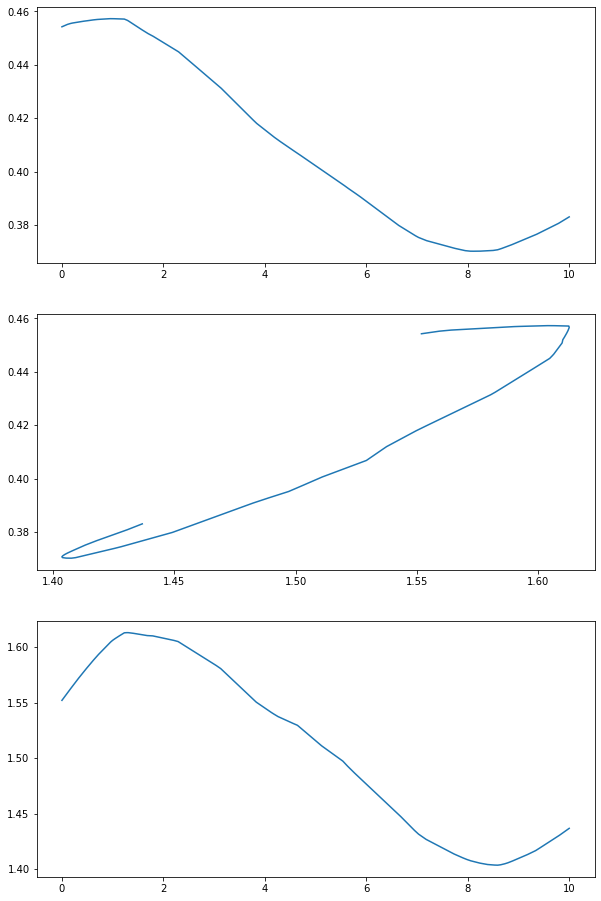

In [38]:
fig, ax = plt.subplots(nrows = 3, figsize=(10,16))
ax[0].plot(initial[["time"]], initial[["x1"]])
ax[1].plot(initial[["x2"]], initial[["x1"]])
ax[2].plot(initial[["time"]], initial[["x2"]])